<a href="https://colab.research.google.com/github/AntonioNvs/projects-of-data-science/blob/main/PISM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Análise dos dados do PISM capturados por Web Scraping</h1>

O objetivo do programa é identificar correlações de desempenho e verificar pontos chaves de estudo e permormance para aprimor os estudos focados em análise de dados.

# Lendo o Arquivo

In [24]:
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv("data.csv")

# Separando as colunas

In [25]:
objetivas1 =  ['PortuguêsO1', 'MatemáticaO1', 'LiteraturaO1', 'HistóriaO1', 'GeografiaO1', 
          'FísicaO1', 'QuímicaO1', 'BiologiaO1']

objetivas2 =  ['PortuguêsO2', 'MatemáticaO2', 'LiteraturaO2', 'HistóriaO2', 'GeografiaO2', 
          'FísicaO2', 'QuímicaO2', 'BiologiaO2']

discursivas1 =  ['PortuguêsD1', 'MatemáticaD1', 'LiteraturaD1', 'HistóriaD1', 'GeografiaD1', 
          'FísicaD1', 'QuímicaD1', 'BiologiaD1']

discursivas2 = ['PortuguêsD2', 'MatemáticaD2', 'LiteraturaD2', 'HistóriaD2', 'GeografiaD2', 
          'FísicaD2', 'QuímicaD2', 'BiologiaD2']

# Boxplot das notas totais

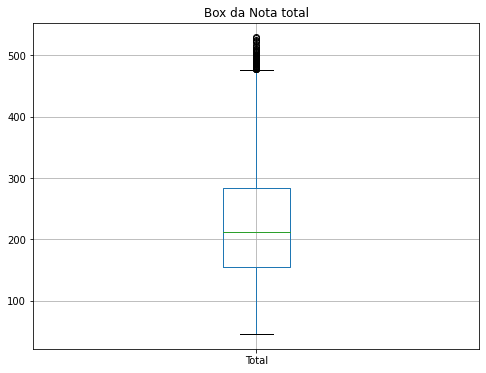

In [26]:
data.boxplot(column="Total", figsize=(8, 6))
plt.title("Box da Nota total")
plt.show()

# Boxplot das notas discursivas do módulo dois

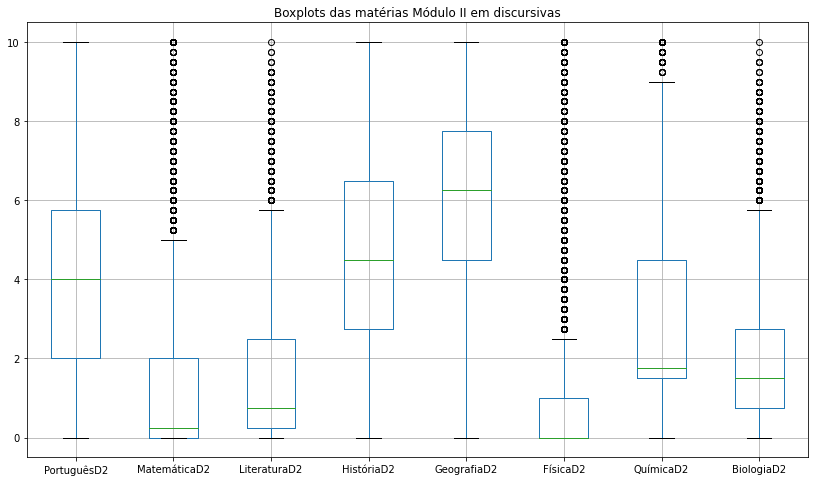

In [27]:
from matplotlib import pyplot as plt

data.boxplot(column=discursivas2, figsize=(14, 8))
plt.title("Boxplots das matérias Módulo II em discursivas")
plt.show()


# Distribuição das notas totais juntamente com a média e mediana



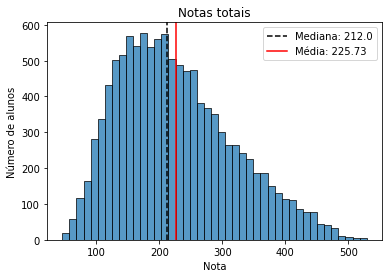

In [28]:
import seaborn as sns

notas_totais = data["Total"]

mediana = notas_totais.median()
media = notas_totais.mean()

sns.histplot(notas_totais)
plt.title("Notas totais")
plt.ylabel("Número de alunos")
plt.xlabel("Nota")

plt.axvline(x = mediana, color="#000", linestyle='--',
                linewidth=1.5,label=f'Mediana: {mediana}')

plt.axvline(x = media, color="#F00", label=f'Média: {round(media, 3)}')

plt.legend(loc=0)

# Pairplot dos dados entre as discursivas dos dois módulos, a fim de achar uma correlação

In [29]:
columns = discursivas1 + discursivas2
# Gráfico muito pesado
# sns.pairplot(data[columns])

# Mostrando os índices de correlação

In [30]:
data[columns].corr()

# Somente nas áres de exatas, possui uma maior relação entre as notas das duas provas discursivas

,PortuguêsD1,MatemáticaD1,LiteraturaD1,HistóriaD1,GeografiaD1,FísicaD1,QuímicaD1,BiologiaD1,PortuguêsD2,MatemáticaD2,LiteraturaD2,HistóriaD2,GeografiaD2,FísicaD2,QuímicaD2,BiologiaD2
PortuguêsD1,1.000000,0.454985,0.342690,0.423214,0.413854,0.390050,0.418006,0.446648,0.425813,0.374743,0.302305,0.463569,0.423459,0.338425,0.422826,0.400013
MatemáticaD1,0.454985,1.000000,0.328748,0.530759,0.556804,0.661806,0.609296,0.610559,0.512260,0.676972,0.349211,0.560522,0.538717,0.575905,0.651667,0.567064
LiteraturaD1,0.342690,0.328748,1.000000,0.389642,0.335441,0.277996,0.297401,0.345214,0.337831,0.262536,0.240841,0.389620,0.372378,0.227989,0.299414,0.305715
HistóriaD1,0.423214,0.530759,0.389642,1.000000,0.533206,0.444648,0.484921,0.534652,0.482426,0.448134,0.349574,0.591668,0.545021,0.386443,0.480855,0.493973
GeografiaD1,0.413854,0.556804,0.335441,0.533206,1.000000,0.476401,0.514761,0.552959,0.443933,0.474425,0.329541,0.534209,0.530038,0.431363,0.498576,0.521821
FísicaD1,0.390050,0.661806,0.277996,0.444648,0.476401,1.000000,0.635365,0.585522,0.448929,0.672230,0.365372,0.493637,0.420080,0.665826,0.645003,0.546941
QuímicaD1,0.418006,0.609296,0.297401,0.484921,0.514761,0.635365,1.000000,0.631629,0.463838,0.616699,0.380343,0.527251,0.468847,0.597324,0.668338,0.568101
BiologiaD1,0.446648,0.610559,0.345214,0.534652,0.552959,0.585522,0.631629,1.000000,0.507156,0.569161,0.379987,0.580883,0.529485,0.535896,0.630693,0.586672
PortuguêsD2,0.425813,0.512260,0.337831,0.482426,0.443933,0.448929,0.463838,0.507156,1.000000,0.451242,0.353064,0.532474,0.491336,0.397388,0.487743,0.478239
MatemáticaD2,0.374743,0.676972,0.262536,0.448134,0.474425,0.672230,0.616699,0.569161,0.451242,1.000000,0.369215,0.486777,0.422665,0.695615,0.668683,0.563404


# Juntando as notas de cada módulo em um total

In [31]:
data["Nota_Modulo1"] = data[discursivas1 + objetivas1].sum(axis=1) * 2
data["Nota_Modulo2"] = data["Total"] - data["Nota_Modulo1"]

# Relação entre as duas notas

Text(0, 0.5, 'Nota do Módulo 2')

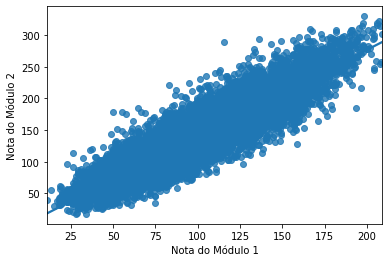

In [32]:
sns.regplot(data=data, x="Nota_Modulo1", y="Nota_Modulo2")
plt.xlabel("Nota do Módulo 1")
plt.ylabel("Nota do Módulo 2")

Text(0, 0.5, 'Alunos')

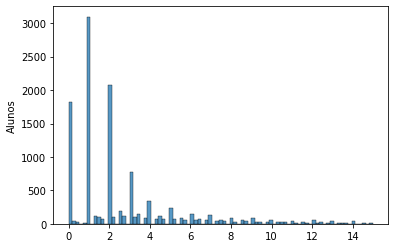

In [33]:
nota_fisica = data["FísicaD2"] + data["FísicaO2"]

sns.histplot(nota_fisica)
plt.ylabel("Alunos")

# Teste de modelo preditivo de notas

Com base na nota do módulo 1, prevê qual será a nota no módulo 2.

In [34]:
input = discursivas1 + objetivas1
output = "Nota_Modulo2"

x = data[input]
y = data[output]

In [35]:
from sklearn.model_selection import train_test_split

SEED = 82

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=SEED)

In [36]:
from sklearn.svm import LinearSVR
from sklearn.metrics import accuracy_score

model = LinearSVR(random_state=SEED)

model.fit(x_train, y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=82, tol=0.0001, verbose=0)

In [37]:
import numpy as np

# Notas de amigos e minha para predição
pedro = np.array([[5.25, 5.25, 7.00, 4.75, 5.00, 1.25, 9.25, 5.50, 4, 4, 4, 5, 4, 2, 5, 4]])
antonio = np.array([[3.25, 8.00, 8.75, 7.50, 4.75, 6.50, 8.50, 2.00, 5, 5, 3, 5, 4, 5, 5, 4]])
vinicius = np.array([[4.75, 2.50, 3.50, 5.00, 3.25, 0.25, 3.00, 0.00, 4, 0, 2, 3, 4, 2, 3, 2]])

model.predict(vinicius)

array([113.45077869])

In [38]:
acuracy = model.score(x_test, y_test)
print(f'A acurácia é de {round(acuracy*100, 2)}%')

A acurácia é de 82.93%


Verifica-se uma ótima acurácia para predição das notas.